# EXPRESO CHURN

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import auc , roc_curve
import warnings
warnings.filterwarnings("ignore")

In [3]:
expresso_churn_df = pd.read_csv('/content/drive/MyDrive/Expresso Churn/Train.csv')
expresso_churn_df.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [4]:
expresso_churn_df.shape

(2154048, 19)

In [5]:
expresso_churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [6]:
expresso_churn_df.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


In [7]:
expresso_churn_df.isnull().sum()

user_id                 0
REGION             849299
TENURE                  0
MONTANT            756739
FREQUENCE_RECH     756739
REVENUE            726048
ARPU_SEGMENT       726048
FREQUENCE          726048
DATA_VOLUME       1060433
ON_NET             786675
ORANGE             895248
TIGO              1290016
ZONE1             1984327
ZONE2             2017224
MRG                     0
REGULARITY              0
TOP_PACK           902594
FREQ_TOP_PACK      902594
CHURN                   0
dtype: int64

In [8]:
# Remove any row with more than 50% missing values
expresso_churn_few_nulls = expresso_churn_df [ expresso_churn_df.count(axis=1) > int(expresso_churn_df.shape[1] * 0.5)] 

In [9]:
columns = ['Non-null','Dtype','Unique'] 
df = pd.DataFrame([expresso_churn_few_nulls.count(),expresso_churn_few_nulls.dtypes,  
              expresso_churn_few_nulls.nunique()]).T
df.columns = columns
df

,Non-null,Dtype,Unique
user_id,1406999,object,1406999
REGION,1109054,object,14
TENURE,1406999,object,8
MONTANT,1376829,float64,6531
FREQUENCE_RECH,1376829,float64,123
REVENUE,1403430,float64,38110
ARPU_SEGMENT,1403430,float64,16534
FREQUENCE,1403430,float64,91
DATA_VOLUME,948749,float64,41441
ON_NET,1256145,float64,9881


In [10]:
expresso_churn_few_nulls.isnull().sum()

user_id                 0
REGION             297945
TENURE                  0
MONTANT             30170
FREQUENCE_RECH      30170
REVENUE              3569
ARPU_SEGMENT         3569
FREQUENCE            3569
DATA_VOLUME        458250
ON_NET             150854
ORANGE             161594
TIGO               547579
ZONE1             1242932
ZONE2             1270429
MRG                     0
REGULARITY              0
TOP_PACK           155606
FREQ_TOP_PACK      155606
CHURN                   0
dtype: int64

In [11]:
expresso_churn_few_nulls.columns

Index(['user_id', 'REGION', 'TENURE', 'MONTANT', 'FREQUENCE_RECH', 'REVENUE',
       'ARPU_SEGMENT', 'FREQUENCE', 'DATA_VOLUME', 'ON_NET', 'ORANGE', 'TIGO',
       'ZONE1', 'ZONE2', 'MRG', 'REGULARITY', 'TOP_PACK', 'FREQ_TOP_PACK',
       'CHURN'],
      dtype='object')

In [12]:
fill_not_given = ['REGION', 'TENURE','TOP_PACK']
fill_zeros = [ 'FREQUENCE_RECH','MONTANT','DATA_VOLUME','REVENUE' , 'ARPU_SEGMENT','FREQUENCE',
              'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2' ,'FREQ_TOP_PACK' ]
              #Assume Nan Revenue implies they don't earn
              # Therefor ARPU_SEGMENT will ,FREQUENCE will also be zeros, if revenues is zero
expresso_churn_few_nulls[fill_not_given] = expresso_churn_few_nulls[fill_not_given].fillna('NotGiven')
expresso_churn_few_nulls[fill_zeros] = expresso_churn_few_nulls[fill_zeros].fillna(0)

# Those to fill with the mode
null_count_series = expresso_churn_few_nulls.isnull().sum()
fill_mode = null_count_series.index[ null_count_series > 0 ]

for col in expresso_churn_few_nulls.columns:
  my_series = expresso_churn_few_nulls.loc[:,col]
  col_mode = my_series.mode()
  expresso_churn_few_nulls.loc[:,col]  = my_series.fillna(col_mode)
  expresso_churn_few_nulls.loc[:,col]  = np.nan_to_num(my_series, 
                                                 copy = False, 
                                                 nan = col_mode, 
                                                 posinf = col_mode, 
                                                 neginf = col_mode)


In [13]:
# Total Number of Columns
expresso_churn_few_nulls['TOTAL_CALLS'] = expresso_churn_few_nulls[['ON_NET','ORANGE','TIGO','ZONE1','ZONE2']].sum(axis=1)

In [14]:
columns = ['Non-null','Dtype','Unique'] 
df = pd.DataFrame([expresso_churn_few_nulls.count(),expresso_churn_few_nulls.dtypes,  
              expresso_churn_few_nulls.nunique()]).T
df.columns = columns
df

,Non-null,Dtype,Unique
user_id,1406999,object,1406999
REGION,1406999,object,15
TENURE,1406999,object,8
MONTANT,1406999,float64,6532
FREQUENCE_RECH,1406999,float64,124
REVENUE,1406999,float64,38111
ARPU_SEGMENT,1406999,float64,16534
FREQUENCE,1406999,float64,92
DATA_VOLUME,1406999,float64,41441
ON_NET,1406999,float64,9881


In [15]:
def plot_for_frequency_count(col_name, plot_title):
  keys, values = np.unique(expresso_churn_few_nulls[col_name] , return_counts = True)
  data_ = pd.DataFrame({'Region':keys, 'Values':values})

  plt.figure(figsize = (17,7))

  sns_plot = sns.barplot(x = 'Region' , y= 'Values', data= data_ )
  for index, row in data_.iterrows():
    sns_plot.text(row.name, row.Values ,row.Values, color='black', ha="center",fontsize=14)

  plt.title(plot_title)  
  plt.show()

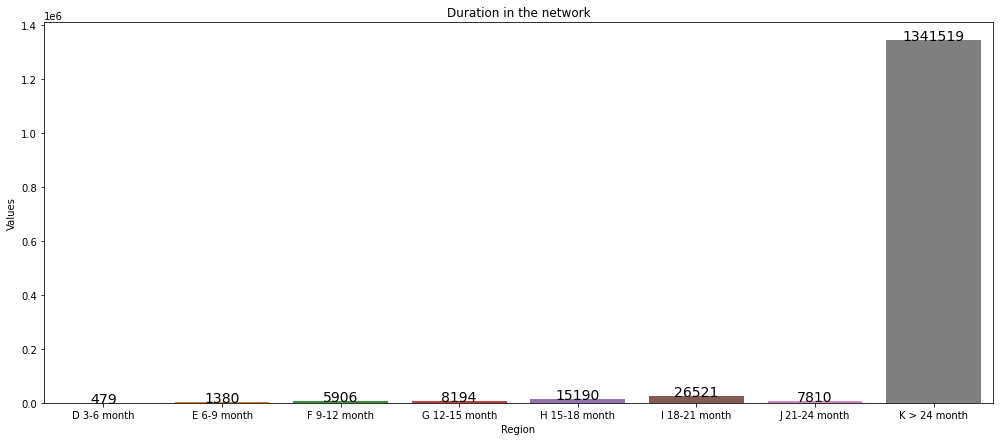

In [16]:
plot_for_frequency_count('TENURE', 'Duration in the network')

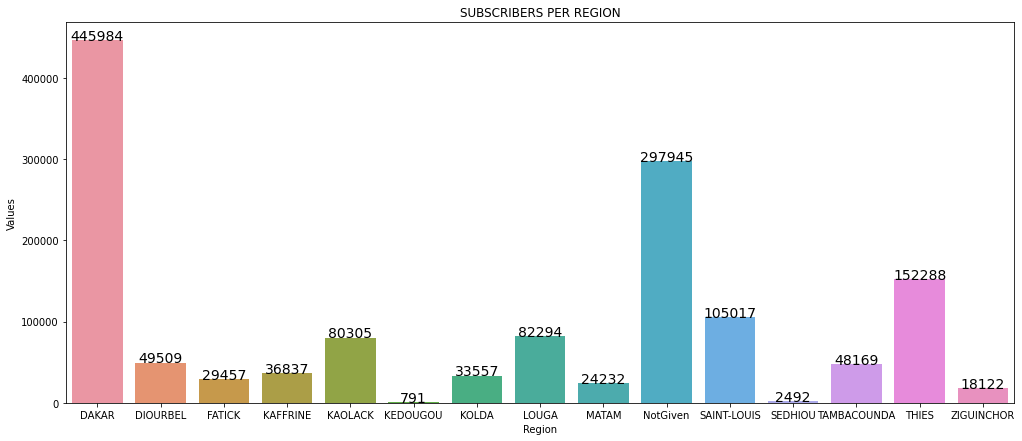

In [17]:
plot_for_frequency_count('REGION', 'SUBSCRIBERS PER REGION')

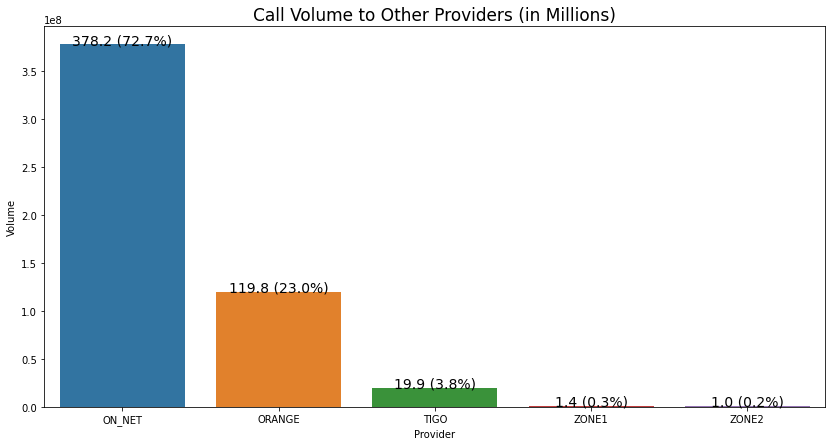

In [19]:
# Plot Volume of call to each 'LINE'/Call Service Provider

total_vol_of_calls = expresso_churn_few_nulls[['ON_NET','ORANGE','TIGO','ZONE1','ZONE2']].sum().sum()
per_csp = expresso_churn_few_nulls[['ON_NET','ORANGE','TIGO','ZONE1','ZONE2']].sum()
percentage_volume = (per_csp  / total_vol_of_calls)*100


call_vol_df = pd.DataFrame( {'Provider':per_csp.index ,
                             'Volume':per_csp.values}  )

plt.figure(figsize=(14,7))
call_vol_plot = sns.barplot(x= 'Provider', y='Volume',data = call_vol_df)
for percent, row_tupple in zip(percentage_volume, call_vol_df.iterrows() ):
  """
  Zip the volume data with the percentage data and Iterate over them
  The 'row' will be a tupple containing the index and value of that row
  """
  row = row_tupple[1]
  text = str(round(row.Volume/1000000, 1)) + ' (' + str(round(percent,1)) + '%)'
  call_vol_plot.text(row.name, row.Volume, text, color= 'black', ha= 'center', fontsize=14,)

plt.title('Call Volume to Other Providers (in Millions)', fontsize=17)
plt.show()


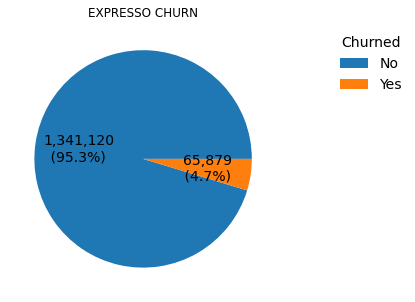

In [20]:
# Churn ratios (Pie Chart)

keys,values = np.unique(expresso_churn_few_nulls['CHURN'], return_counts=True)

def func(percent, allvalues):
  actual_val = round( (percent/100)*values.sum(), 1 )
  return "{:,d}\n ({:.1f}%) ".format(int(actual_val), percent )

plt.figure(figsize=(5,5))

wedges, texts, autotexts = plt.pie(values, autopct=lambda x : func(x, values),
                                   pctdistance = 0.6,
                                   textprops = dict(color='black') ,
                                   )

legend  = plt.legend( wedges, ["No", "Yes"],
           title = "Churned",
           frameon = False,           
           loc = "best",
           bbox_to_anchor=(1, 0, 0.5, 1) ,
           prop={'size': 14})

plt.setp(autotexts, size=14  )
plt.setp(legend.get_title(),fontsize=14)
plt.title("EXPRESSO CHURN")
plt.show()


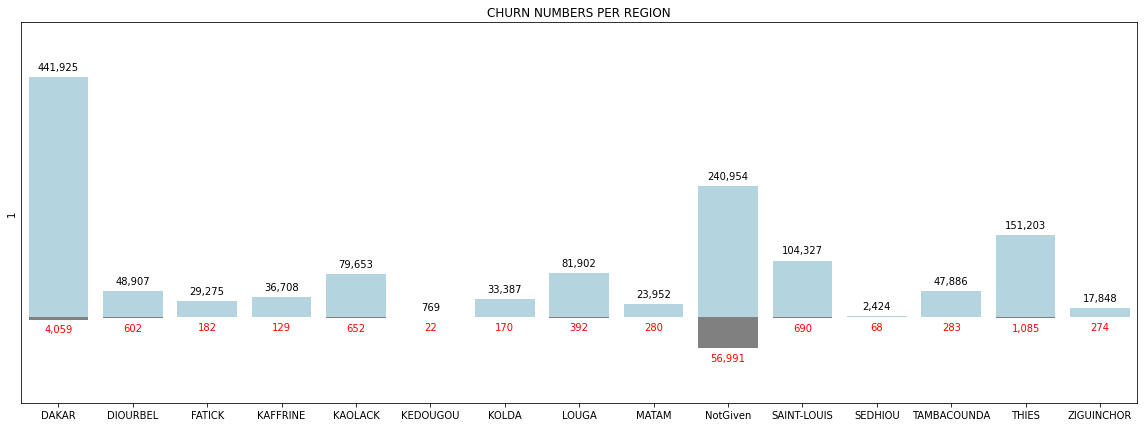

In [21]:
# Churn Per Region
cols = ['user_id',  'CHURN',  'REGION']
churn_per_region = expresso_churn_few_nulls[cols].pivot_table(values = 'user_id',
                                                          index='REGION', 
                                                          columns = 'CHURN' ,
                                                          aggfunc= 'count')
churn_per_region[1] = churn_per_region[1]*(-1)


plt.figure(figsize=(20,7))

ax = sns.barplot(x = churn_per_region.index.values ,
                 y = churn_per_region[0] ,
                 color = 'lightblue')
ax = sns.barplot(x = churn_per_region.index.values ,
                 y = churn_per_region[1] ,
                 color = 'gray')


for plot in ax.patches:
  signed = 1
  selected_color = 'black'
  if plot.get_height() < 0:
    signed = -1
    selected_color = 'red'

  ax.annotate( '{:,d}'.format(abs(int(plot.get_height())) ),
              (plot.get_x() + plot.get_width() / 2,
              plot.get_height()), ha='center', va='center',
              size=10, xytext=(0, signed*10),
              textcoords='offset points' , 
              color = selected_color
              )
  
plt.ylim( churn_per_region[1].min()-100000, churn_per_region[0].max()+100000)
plt.tick_params( right=False, left = False, labelleft = False) 
plt.title('CHURN NUMBERS PER REGION')
plt.show()


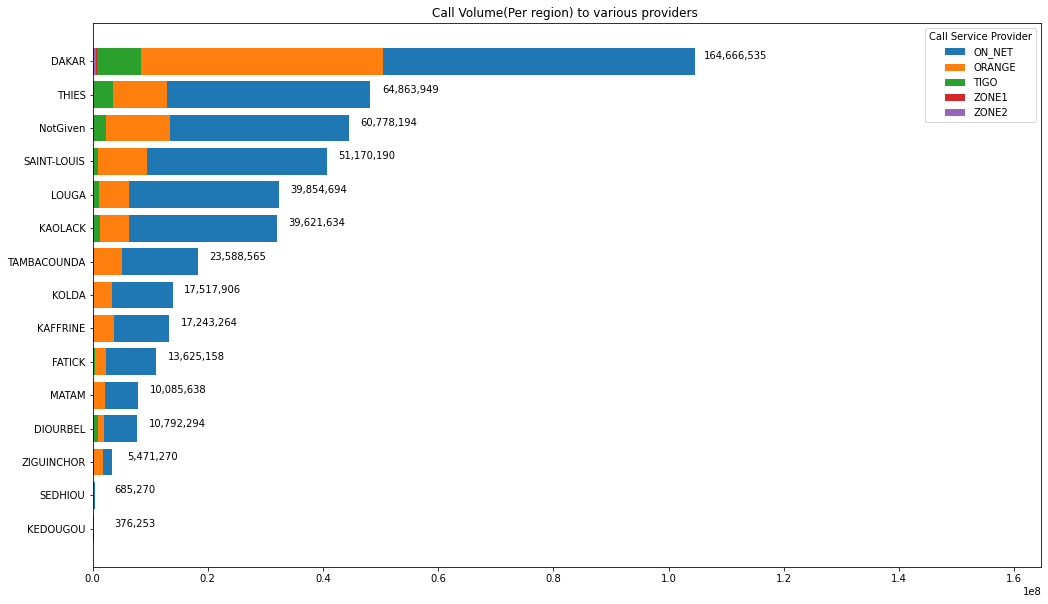

In [22]:
# Call volume per region to various CSPs
cols = ['REGION','ON_NET', 'ORANGE', 'TIGO',	'ZONE1',	'ZONE2']
csp_cols = ['ON_NET', 'ORANGE', 'TIGO',	'ZONE1',	'ZONE2']

call_vol_per_region = expresso_churn_few_nulls[cols].groupby('REGION').agg('sum')
call_vol_per_region = call_vol_per_region.sort_values(csp_cols,
                                ascending = True )


fig  = plt.figure(figsize=(17,10))
ax = fig.subplots()

h1 = ax.barh(call_vol_per_region.index.values ,
       call_vol_per_region['ON_NET'] ,
       label = 'ON_NET')
h2 = ax.barh(call_vol_per_region.index.values ,
       call_vol_per_region['ORANGE'],
       label = 'ORANGE')
h3 = ax.barh(call_vol_per_region.index.values ,
       call_vol_per_region['TIGO'],
       label = 'TIGO')
h4 = ax.barh(call_vol_per_region.index.values ,
       call_vol_per_region['ZONE1'],
       label = 'ZONE1')
h5 = ax.barh(call_vol_per_region.index.values ,
       call_vol_per_region['ZONE2'],
       label = 'ZONE2')

for r1, r2, r3, r4, r5 in zip(h1, h2, h3, h4, h5):
    h1 = r1.get_width()
    h2 = r2.get_width()
    h3 = r3.get_width()
    h4 = r4.get_width()
    h5 = r5.get_width()
    
    y = r1.get_y()+r1.get_height()/2
    x = h1+ h2+ h3+ h4+ h5 # Last value total + prev value end
    x_pos = h1+ r1.get_x() + 7000000

    plt.text(x_pos, y, '{:,.0f}'.format(x), ha = 'center', va='bottom')
    

plt.legend(title = 'Call Service Provider', loc='best')
x_limit  = call_vol_per_region.sum(axis=1).max()+1000
plt.xlim(0 , x_limit)
plt.title('Call Volume(Per region) to various providers ')
plt.show()


# Converting the categorical Data

In [23]:
expresso_churn_few_nulls.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN,TOTAL_CALLS
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0,438.0
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NotGiven,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,0.0,90.0,46.0,7.0,0.0,0.0,NO,17,On-net 1000F=10MilF;10d,1.0,0,143.0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,0.0,0.0,NO,62,"Data:1000F=5GB,7d",11.0,0,145.0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,0.0,39.0,24.0,0.0,0.0,0.0,NO,11,Mixt 250F=Unlimited_call24H,2.0,0,63.0
5,0000296564272665ccd2925d377e124f3306b01e,LOUGA,K > 24 month,8500.0,17.0,9000.0,3000.0,18.0,0.0,252.0,70.0,91.0,0.0,0.0,NO,62,MIXT:500F= 2500F on net _2500F off net;2d,18.0,0,413.0


In [24]:
expresso_churn_few_nulls.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1406999 entries, 0 to 2154046
Data columns (total 20 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   user_id         1406999 non-null  object 
 1   REGION          1406999 non-null  object 
 2   TENURE          1406999 non-null  object 
 3   MONTANT         1406999 non-null  float64
 4   FREQUENCE_RECH  1406999 non-null  float64
 5   REVENUE         1406999 non-null  float64
 6   ARPU_SEGMENT    1406999 non-null  float64
 7   FREQUENCE       1406999 non-null  float64
 8   DATA_VOLUME     1406999 non-null  float64
 9   ON_NET          1406999 non-null  float64
 10  ORANGE          1406999 non-null  float64
 11  TIGO            1406999 non-null  float64
 12  ZONE1           1406999 non-null  float64
 13  ZONE2           1406999 non-null  float64
 14  MRG             1406999 non-null  object 
 15  REGULARITY      1406999 non-null  int64  
 16  TOP_PACK        1406999 non-null  ob

In [26]:
def top_pack_freq(df_column) :
  keys, values = np.unique(expresso_churn_few_nulls[df_column],
                          return_counts= True)
  # very_high = np.percentile(values,95)
  high = np.percentile(values,90)
  medium = np.percentile(values,60)
  low =  np.percentile(values,30)

  ref_dict = dict()
  for key, value in zip(keys,values):
    if key != 'NotGiven':
      #if value > very_high : # Values that occur alot
       # ref_dict[key] = "very_high_freq"
      if value > high : 
        ref_dict[key] = "high_freq"
      elif value > medium : 
        ref_dict[key] = "medium_freq"
      elif value > low : 
        ref_dict[key] = "low_freq"
      else:
        # Values that occur very few times
        ref_dict[key] = "very_low_freq" 
    else:
      ref_dict[key] = "NotGiven"


  return ref_dict 


top_pack_freq_dict = top_pack_freq('TOP_PACK')
expresso_churn_few_nulls['TOP_PACK'] = expresso_churn_few_nulls['TOP_PACK'].apply(lambda x: top_pack_freq_dict[x])


In [27]:
# Drop the Columns with many Nulls Initially
cols_to_drop = ['REGION','TOP_PACK', 'ON_NET', 'ORANGE', 'TIGO', 'ZONE1', 'ZONE2','DATA_VOLUME','MRG','REVENUE']
# 'REVENUE'is correlated to APRU_SEGMENT
expresso_churn_few_nulls = expresso_churn_few_nulls.drop(cols_to_drop, axis=1)
# ZONE1, ZONE2, REGION, DATA_VOLUME has too many nulls
# MRG Had only one value 


expresso_prep = expresso_churn_few_nulls.copy()

In [28]:
#cats_for_odirnal = []
#for i in range(len(unique_tenure)):
 # cat = [unique_tenure, i+1]
 # cats_for_odirnal.append(cat)

enc = OrdinalEncoder()
enc.fit(expresso_churn_few_nulls[['TENURE']])
print(enc.categories_)
#enc.transform([['Female', 3], ['Male', 1]])
#array([[0., 2.],
 #      [1., 0.]])

[array(['D 3-6 month', 'E 6-9 month', 'F 9-12 month', 'G 12-15 month',
       'H 15-18 month', 'I 18-21 month', 'J 21-24 month', 'K > 24 month'],
      dtype=object)]


In [29]:
ohe = OneHotEncoder(sparse = False)
obj_cols = ['TENURE'] # Remove 'REGION','TOP_PACK' ?
ohe.fit(expresso_prep[obj_cols])
converted = ohe.transform(expresso_prep[obj_cols])
expresso_prep = expresso_prep.drop(obj_cols, axis=1)

# Concat the encoded result with the initial df
expresso_encoded = pd.concat([expresso_prep,
                          pd.DataFrame(converted)],
                          join = 'inner',
                          axis=1)


expresso_encoded = expresso_encoded.set_index('user_id')


# Train test split
# Class imbalance

In [30]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE 
from collections import Counter

In [31]:
x_cols = [col for col in expresso_encoded.columns if col != 'CHURN' ]
X = expresso_encoded[x_cols]
Y = expresso_encoded['CHURN']

oversample = SMOTE(sampling_strategy= 0.1)
X_, Y_ = oversample.fit_resample(X, Y)
print(Counter(Y) , Counter(Y_))

Counter({0: 875872, 1: 43037}) Counter({0: 875872, 1: 87587})


In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [33]:
ss = sc.fit(X_)
ssX = ss.transform(X_)

In [34]:
ssX.shape

(963459, 15)

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(ssX,Y_,
                                                    test_size = 0.2, 
                                                    random_state=123)

# Reshaping
Y_train = np.array(Y_train).reshape(Y_train.shape[0],1 )
X_train = np.array(X_train).reshape(X_train.shape[0], X_train.shape[1],1 )
X_test = np.array(X_test).reshape(X_test.shape[0], X_test.shape[1] ,1 )

X_train.shape

(770767, 15, 1)

# Model

In [36]:
from keras import Sequential
from keras.layers import GRU,Dense,Dropout,Activation, Embedding
from tensorflow.keras.optimizers import Adam

In [37]:
model = Sequential()
model.add(Embedding(input_dim = X_train.shape[1],
                    output_dim = Y_train.shape[1]))
model.add(GRU(units = 30, return_sequences=True, dropout = 0.2 ))
model.add(GRU(units = 30, dropout=0.2 ))
model.add(Dense(1, activation='relu' ))


opt = Adam(learning_rate=0.001)
model.compile(optimizer= opt, loss='binary_crossentropy' , 
              metrics = ['mse'] )

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 1)           15        
                                                                 
 gru (GRU)                   (None, None, 30)          2970      
                                                                 
 gru_1 (GRU)                 (None, 30)                5580      
                                                                 
 dense (Dense)               (None, 1)                 31        
                                                                 
Total params: 8,596
Trainable params: 8,596
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(X_train ,  Y_train , batch_size = 1000, epochs = 30)

Epoch 1/30
771/771 [==============================] - 21s 17ms/step - loss: 0.3010 - mse: 0.0816
Epoch 2/30
771/771 [==============================] - 13s 17ms/step - loss: 0.3002 - mse: 0.0814
Epoch 3/30
771/771 [==============================] - 14s 18ms/step - loss: 0.2906 - mse: 0.0800
Epoch 4/30
771/771 [==============================] - 13s 17ms/step - loss: 0.2808 - mse: 0.0789
Epoch 5/30
771/771 [==============================] - 13s 17ms/step - loss: 0.2848 - mse: 0.0793
Epoch 6/30
771/771 [==============================] - 13s 17ms/step - loss: 0.2793 - mse: 0.0783
Epoch 7/30
771/771 [==============================] - 13s 17ms/step - loss: 0.2775 - mse: 0.0780
Epoch 8/30
771/771 [==============================] - 13s 17ms/step - loss: 0.2763 - mse: 0.0778
Epoch 9/30
771/771 [==============================] - 13s 17ms/step - loss: 0.2764 - mse: 0.0778
Epoch 10/30
771/771 [==============================] - 13s 17ms/step - loss: 0.2832 - mse: 0.0787
Epoch 11/30
771/771 [========

Text(0.5, 1.0, 'Model MSE')

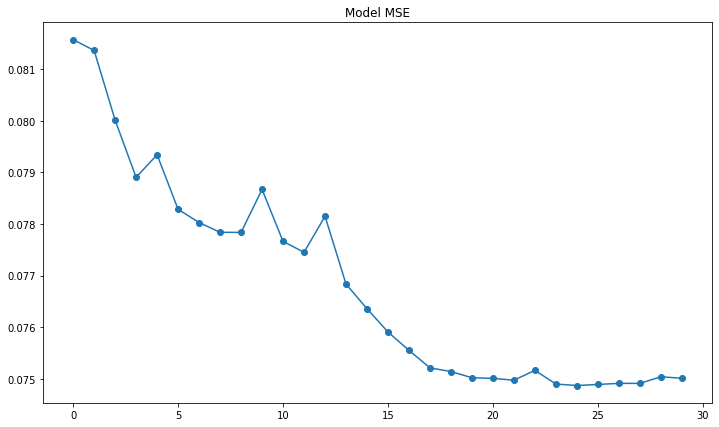

In [42]:
history = model.history.history
plt.figure(figsize=(12,7))
plt.plot(history['mse'],marker = 'o'  )
plt.title('Model MSE')

In [43]:
def get_class(pred_):
  return [1 if i[0]>0.5 else 0 for i in pred_ ]
  
  
pred = model.predict(X_test)
pred_list = [i[0] for i in pred  ]

pred_classes =  get_class(pred)
print("Accuracy Score : ",accuracy_score(Y_test, pred_classes))

# ROC and AUC
fpr, tpr, thresholds = roc_curve(Y_test, pred)
print("AUC : ", auc(fpr, tpr))

Accuracy Score :  0.9108369833724286
AUC :  0.7997237917675087


In [44]:
print(classification_report(Y_test, pred_classes))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95    175015
           1       1.00      0.03      0.05     17677

    accuracy                           0.91    192692
   macro avg       0.96      0.51      0.50    192692
weighted avg       0.92      0.91      0.87    192692



In [45]:
def pack_freq(x):
  try:
    return top_pack_freq_dict[x]
  except KeyError: 
    '''
    If it didn't appear frequently enough to appear in train
    its likely low freq
    '''
    return "very_low_freq"

In [46]:
test_data = pd.read_csv('/content/drive/MyDrive/Expresso Churn/Test.csv')
#test_data.head(10)

test_data[fill_not_given] = test_data[fill_not_given].fillna('NotGiven')
test_data[fill_zeros] = test_data[fill_zeros].fillna(0)

for col in fill_mode:
  my_series = test_data.loc[:,col]
  col_mode = my_series.mode()
  test_data.loc[:,col]  = my_series.fillna(col_mode)
  test_data.loc[:,col]  = np.nan_to_num(my_series, 
                                                 copy = False, 
                                                 nan = col_mode, 
                                                 posinf = col_mode, 
                                                 neginf = col_mode)
  
# Total Number of Columns
test_data['TOTAL_CALLS'] = test_data[['ON_NET','ORANGE','TIGO','ZONE1','ZONE2']].sum(axis=1)


test_data['TOP_PACK'] = test_data['TOP_PACK'].apply(lambda x: pack_freq(x))


expresso_test_data = test_data.copy()

converted_test = ohe.transform(expresso_test_data[obj_cols])
expresso_test_data = expresso_test_data.drop(obj_cols, axis=1)

# Concat the encoded result with the initial df
expresso_encoded_test_data = pd.concat([expresso_test_data,
                          pd.DataFrame(converted)],
                          join = 'inner',
                          axis=1)


expresso_encoded_test_data = expresso_encoded_test_data.set_index('user_id')
expresso_encoded_test_data  =  expresso_encoded_test_data.drop(cols_to_drop , axis=1)


In [47]:
scaled_test_data = ss.transform(expresso_encoded_test_data)

scaled_test_data = np.array(scaled_test_data).reshape(scaled_test_data.shape[0], 
                                                      scaled_test_data.shape[1],
                                                      1 )

scaled_test_data.shape

(380127, 15, 1)

In [48]:
test_pred = model.predict(scaled_test_data)
test_pred_list = [i[0] for i in test_pred ]

df = pd.DataFrame({'user_id': expresso_encoded_test_data.index.values,
                   'CHURN': test_pred_list}).set_index('user_id')
df.head()

,CHURN
user_id,
00001dbe00e56fc4b1c1b65dda63de2a5ece55f9,0.053127
000055d41c8a62052dd426592e8a4a3342bf565d,0.053127
000081dd3245e6869a4a9c574c7050e7bb84c2c8,0.021691
0000b76d2145d9445d9ff6b65c9ebc4196c89337,0.193370
0000bae5480628cf8fe51ad84bcb39772fc79224,0.193370


In [ ]:
#df.to_csv('Few_smote_base2.csv')